In [1]:
#importing libraries

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

In [2]:
import nltk

In [3]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
imdb_data=pd.read_csv('IMDB Dataset.csv')

In [5]:
imdb_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
nltk.download('punkt')       # for tokenization
nltk.download('stopwords')   # for stop words
nltk.download('wordnet')     # for lemmatizer
nltk.download('averaged_perceptron_tagger')  # For word type tagging
nltk.download('omw-1.4')     # For more information on the WordNet lemmatizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
#searching null values
print(imdb_data.isnull().sum())

review       0
sentiment    0
dtype: int64


In [8]:
#cleaning text

import re

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # deleting HTML tag
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # deleting special char.
    text = text.lower()  # change to lower char.
    return text

imdb_data['clean_review']=imdb_data['review'].apply(clean_text)

In [9]:
imdb_data

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,im going to have to disagree with the previous...


In [10]:
#Tokenization of texts

from nltk.tokenize import word_tokenize

imdb_data['tokens']=imdb_data['clean_review'].apply(clean_text)


In [11]:
#deleting stop words

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [12]:
stop_words=set(stopwords.words('english'))
stemmer=PorterStemmer()

def preprocess_tokens(tokens):
    return[stemmer.stem(word) for word in tokens if word not in stop_words]

imdb_data['preprocess_tokens'] = imdb_data['tokens'].apply(preprocess_tokens)

In [13]:
#analyzinggg

from collections import Counter

all_words = [word for tokens in imdb_data['preprocess_tokens'] for word in tokens]
word_freq = Counter(all_words)

print(word_freq.most_common(10))  # 10 most used words


[(' ', 11305214), ('e', 6098589), ('n', 3373044), ('r', 2860539), ('h', 2781171), ('l', 2250665), ('c', 1428994), ('u', 1363036), ('f', 1132485), ('g', 1063476)]


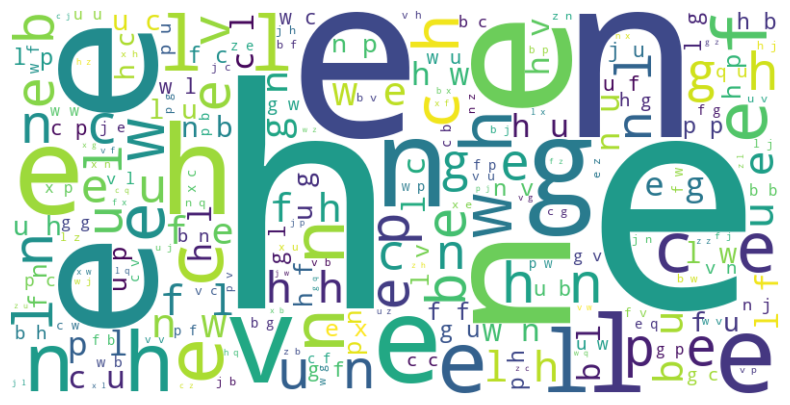

In [14]:
#visiualizng

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [15]:
#Preparation of data for the model

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(imdb_data['clean_review']).toarray()

y = imdb_data['sentiment']





In [16]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [18]:
#Analysis with ML model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8479


In [19]:
# if  it is in the form y_test `positive` və `negative`, then we replace them with 1 və 0 
y_test_binary = [1 if label == 'positive' else 0 for label in y_test]
                 
y_pred_binary = [1 if label == 'positive' else 0 for label in y_pred]


positive_count = sum(y_test_binary)  # count of positive
negative_count = len(y_test_binary) - positive_count  # count of negative

print(f"Positive : {positive_count}")
print(f"Negative : {negative_count}")


Positive : 5039
Negative : 4961


In [22]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt=dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7143


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print("Random Forest Accuracy:", accuracy_score(y_test,rf_model.predict(X_test)))

In [ ]:
# XGBoost


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))
